# Installing necessary packages, can ask the users to restart the notebook

In [ ]:
# !sudo apt-get install -y libjpeg-dev zlib1g-dev graphviz #Do this if pillow fails
%pip install scikit-image PyMuPDF python-docx opencv-python scipy torch torchvision==0.2.1 pillow==8.3.1 tensorflow==2.15 gdown pydot

You will be prompted to Restart the session. Continue running the cells after restarting

# Importing the necessary modules

In [2]:
# Data Pre-processing
import fitz
import cv2
import csv
import os
from docx import Document
import string
import requests
import pandas as pd
import numpy as np
from PIL import Image, ImageOps
from IPython.display import clear_output as cls

# Data
from glob import glob
from tqdm import tqdm
import tensorflow.data as tfd

# Data Visualization
import matplotlib.pyplot as plt

# Model
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, callbacks
from tensorflow.keras.utils import plot_model

2025-03-22 19:11:05.892045: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-03-22 19:11:05.919861: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-03-22 19:11:05.919897: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-03-22 19:11:05.920814: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-03-22 19:11:05.925638: I tensorflow/core/platform/cpu_feature_guar

# Downloading the dataset

Skip (if done in Dataset_Generation.ipynb)

In [6]:
# Downloading the Dataset on collab/local notebook

# Virtuosa ( Dataset 1)
!gdown 'http://drive.google.com/uc?id=10NX_UbV2HMbPEO2fvKYAIXOOOec0g38g'  # Downloading link for Ancient Text
# !gdown 'http://drive.google.com/uc?id=1YTaqNoZCYP74AuQxlyJsiQLhcoc8DNSv'  # Downloading link for Ground Truth Text

# Perfecto ( Dataset 2)
!gdown 'http://drive.google.com/uc?id=1x6FS3z4WhsHS7s38a2oSH8JnLQ_u_f21'  # Downloading link for Ancient Text
# !gdown 'http://drive.google.com/uc?id=1YqQ04ZQR4xdjKlQS9xL9zkkWYx_Ppxwa'  # Downloading link for Ground Truth Text

!gdown 'http://drive.google.com/uc?id=1r7TjJ9RjNZHxAzKhd4uOaRWanrQXIqw8'  # Downloading utils.py from cloud

Downloading...
From: http://drive.google.com/uc?id=10NX_UbV2HMbPEO2fvKYAIXOOOec0g38g
To: /teamspace/studios/this_studio/Padilla - Nobleza virtuosa_testExtract.pdf
100%|██████████████████████████████████████| 2.58M/2.58M [00:00<00:00, 24.5MB/s]
Downloading...
From: http://drive.google.com/uc?id=1x6FS3z4WhsHS7s38a2oSH8JnLQ_u_f21
To: /teamspace/studios/this_studio/Padilla - 2 Noble perfecto_Extract.pdf
100%|██████████████████████████████████████| 3.95M/3.95M [00:00<00:00, 86.5MB/s]
Downloading...
From (original): http://drive.google.com/uc?id=1r7TjJ9RjNZHxAzKhd4uOaRWanrQXIqw8
From (redirected): https://drive.google.com/uc?id=1r7TjJ9RjNZHxAzKhd4uOaRWanrQXIqw8&confirm=t&uuid=17c4b0ab-7c99-4507-84c6-08a72af4f7f9
To: /teamspace/studios/this_studio/utils.py
100%|██████████████████████████████████████| 17.0k/17.0k [00:00<00:00, 63.7MB/s]


In [3]:
!ls

 CRAFT_Model					        preprocessing
 Dataset_Generation.ipynb			        __pycache__
 Model.ipynb					        README.md
'Padilla - 1 Nobleza virtuosa_testTranscription.docx'   traning_data1
'Padilla - 2 Noble perfecto_Extract.pdf'	        traning_data2
'Padilla - 2 Noble perfecto_Transcription.docx'         utils.py
'Padilla - Nobleza virtuosa_testExtract.pdf'


# Pre-processing the dataset

### Converting PDF to images

In [16]:
from utils import pdf_to_images

pdf_path1 = "./Padilla - Nobleza virtuosa_testExtract.pdf"  # Path to the PDF file
unproc_images_folder_1 = "./preprocessing/imgsUnProcessed1"  # Output folder to save the images
if not os.path.exists(unproc_images_folder_1):
    os.makedirs(unproc_images_folder_1)
pdf_to_images(pdf_path1, unproc_images_folder_1)


pdf_path2 = "./Padilla - 2 Noble perfecto_Extract.pdf"  # Path to the PDF file
unproc_images_folder_2 = "./preprocessing/imgsUnProcessed2"  # Output folder to save the images
if not os.path.exists(unproc_images_folder_2):
    os.makedirs(unproc_images_folder_2)
pdf_to_images(pdf_path2, unproc_images_folder_2)

<img src="https://raw.githubusercontent.com/ML4SCI/DeepLearnHackathon/main/NLPRenaissanceChallenge/images/imageOriginal.png">

### Splitting two sided scanned images into individual pages.

In [17]:
#Segregating 2-sided pages into individual pages
from utils import process_images

unproc_images_folder_1 = "./preprocessing/imgsUnProcessed1"
proc_images_folder_1 = "./preprocessing/imgsForAllPages1"
if not os.path.exists(proc_images_folder_1):
    os.makedirs(proc_images_folder_1)
process_images(unproc_images_folder_1, proc_images_folder_1)


unproc_images_folder_2 = "./preprocessing/imgsUnProcessed2"
proc_images_folder_2 = "./preprocessing/imgsForAllPages2"
if not os.path.exists(proc_images_folder_2):
    os.makedirs(proc_images_folder_2)
process_images(unproc_images_folder_2, proc_images_folder_2)

print("Image processing complete!")

Image processing complete!


In [18]:
# Check if the folder already exists
if not os.path.exists('CRAFT_Model'):
    # If it doesn't exist, clone the repository
    !git clone 'https://github.com/Shashankss1205/CRAFT_Model'
else:
    print(f"The repository already exists.")

The repository already exists.


# Text Detection
### Extracting words from a scanned text page image can be achieved using any model of your choice. We are using the [CRAFT Model](https://github.com/clovaai/CRAFT-pytorch) for the same. (This will take 1 min to process the entire model)

In [4]:
#It generally takes about ~1 min
# --text_threshold 0.7 --low_text 0.3 --link_threshold 0.5 (Try different values for different results)
!python3 CRAFT_Model/CRAFT/BoundBoxFunc/test.py --cuda 1 --result_folder='./preprocessing/BoundBoxApplied1/' --test_folder="./preprocessing/imgsForAllPages1" --trained_model='CRAFT_Model/CRAFT/BoundBoxFunc/weights/craft_mlt_25k.pth'

Loading weights from checkpoint (CRAFT_Model/CRAFT/BoundBoxFunc/weights/craft_mlt_25k.pth)
elapsed time : 21.053935289382935simgsForAllPages1/image_15.png


In [5]:
#It generally takes about ~1 min
!python3 CRAFT_Model/CRAFT/BoundBoxFunc/test.py --cuda 1 --result_folder='./preprocessing/BoundBoxApplied2/' --test_folder="./preprocessing/imgsForAllPages2" --trained_model='CRAFT_Model/CRAFT/BoundBoxFunc/weights/craft_mlt_25k.pth'

Loading weights from checkpoint (CRAFT_Model/CRAFT/BoundBoxFunc/weights/craft_mlt_25k.pth)
elapsed time : 17.200958013534546simgsForAllPages2/image_15.png


### The output of this model provides coordinates of the polygon enclosing the word. Using these coordinates one can draw a bounding box and crop word images.

In [6]:
#Sorting the BB based on the Spanish writing style
from utils import sort_bounding_boxes

bound_box_applied1 = './preprocessing/BoundBoxApplied1/'
bound_box_sorted1 = "./preprocessing/BoundBoxSorted1"
if not os.path.exists(bound_box_sorted1):
    os.makedirs(bound_box_sorted1)
sort_bounding_boxes(bound_box_applied1, bound_box_sorted1)

bound_box_applied2 = './preprocessing/BoundBoxApplied2/'
bound_box_sorted2 = "./preprocessing/BoundBoxSorted2"
if not os.path.exists(bound_box_sorted2):
    os.makedirs(bound_box_sorted2)
sort_bounding_boxes(bound_box_applied2, bound_box_sorted2)

<img src="https://raw.githubusercontent.com/ML4SCI/DeepLearnHackathon/main/NLPRenaissanceChallenge/images/imageCRAFT.jpg">

# Generating Test Data

###  Extracts and saves bounding boxes from images using a numeric counter for filenames, skipping the training images.

In [7]:
# from utils import apply_extraction_to_folder_for_test
from utils import count_files_in_folder, extract_bounding_boxes
def apply_extraction_to_folder_for_test(image_folder, bounding_box_folder, output_folder, word, TRAIN_PAGES):
    for image in range(count_files_in_folder(image_folder, ['.png', '.jpeg', '.jpg']) - TRAIN_PAGES):
        image_filename = 'image_' + str(image+TRAIN_PAGES+1) + '.png'
        if image_filename.endswith('.png') or image_filename.endswith('.jpg'):
            image_base_name = os.path.splitext(image_filename)[0]
            print(image_base_name)
            bounding_box_filename = "res_" + image_base_name + '_sorted.txt'
            bounding_box_path = os.path.join(bounding_box_folder, bounding_box_filename)
            if os.path.exists(bounding_box_path):
                image_path = os.path.join(image_folder, image_filename)
                word = extract_bounding_boxes(image_path, bounding_box_path, output_folder, word)
            else:
                print(f'Bounding box file for {image_filename} does not exist.')

proc_images_folder_1 = './preprocessing/imgsForAllPages1'
bound_box_sorted1 = './preprocessing/BoundBoxSorted1'
word = 0
TRAIN_PAGES=25
testing_data1 = './testing_data1'
apply_extraction_to_folder_for_test(proc_images_folder_1, bound_box_sorted1, testing_data1, word, TRAIN_PAGES)


proc_images_folder_2 = './preprocessing/imgsForAllPages2'
bound_box_sorted2 = './preprocessing/BoundBoxSorted2'
word = 30
TRAIN_PAGES=0
testing_data2 = './testing_data2'
apply_extraction_to_folder_for_test(proc_images_folder_2, bound_box_sorted2, testing_data2, word, TRAIN_PAGES)

image_26
image_27
image_28
image_29
image_30
image_31
image_1
image_2
image_3
image_4
image_5
image_6
image_7
image_8
image_9
image_10
image_11
image_12
image_13
image_14
image_15
image_16
image_17
image_18
image_19
image_20
image_21
image_22
image_23
image_24
image_25
image_26
image_27
image_28
image_29
image_30
image_31


In [8]:
from utils import pad_and_resize_images

testing_data1 = './testing_data1'
pad_and_resize_images(testing_data1)

testing_data2= './testing_data2'
pad_and_resize_images(testing_data2)

Processed and replaced: ./testing_data1/381;15.png
Processed and replaced: ./testing_data1/716;1.png
Processed and replaced: ./testing_data1/659;13.png
Processed and replaced: ./testing_data1/257;17.png
Processed and replaced: ./testing_data1/250;16.png
Processed and replaced: ./testing_data1/601;3.png
Processed and replaced: ./testing_data1/406;19.png
Processed and replaced: ./testing_data1/240;15.png
Processed and replaced: ./testing_data1/260;17.png
Processed and replaced: ./testing_data1/654;13.png
Processed and replaced: ./testing_data1/443;1.png
Processed and replaced: ./testing_data1/81;14.png
Processed and replaced: ./testing_data1/674;17.png
Processed and replaced: ./testing_data1/315;4.png
Processed and replaced: ./testing_data1/71;13.png
Processed and replaced: ./testing_data1/584;1.png
Processed and replaced: ./testing_data1/792;14.png
Processed and replaced: ./testing_data1/179;5.png
Processed and replaced: ./testing_data1/578;1.png
Processed and replaced: ./testing_data1/

# Gathering Training Data

### 2 methods of generating training data:
1. Use the Dataset_generation.ipynb
2. Use modified and corrected data from drive link(better results)

### Generating training data using Dataset_generation Function

Run the Dataset_Generation.ipynb before running this notebook, to generate the training data. OR Directly run the below command

In [27]:
# %pip install jupyter nbconvert

In [28]:
# !jupyter nbconvert --to notebook --execute Dataset_Generation.ipynb

In [ ]:
# Transferring the corrected dataset to the correct location for training
# !mv './outputChanged/output' './training_data1'

### Manually Corrected Training data

In [9]:
# Training data, corrrected manually
!gdown 'https://drive.google.com/uc?id=1Gd9BWP0aixcSrs_vkDXJewd1sZEir8-m'
!unzip outputCorrected.zip

Downloading...
From: https://drive.google.com/uc?id=1Gd9BWP0aixcSrs_vkDXJewd1sZEir8-m
To: /home/shashank/Desktop/GSOC'25/HumanAI_Task_submission_1/outputCorrected.zip
100%|██████████████████████████████████████| 1.81M/1.81M [00:00<00:00, 5.02MB/s]
Archive:  outputCorrected.zip
   creating: outputChanged/output/
 extracting: outputChanged/output/a.png  
 extracting: outputChanged/output/abatio.png  
 extracting: outputChanged/output/abatirse.png  
 extracting: outputChanged/output/aborre.png  
 extracting: outputChanged/output/ac.png  
 extracting: outputChanged/output/acavallo.png  
 extracting: outputChanged/output/acciones.png  
 extracting: outputChanged/output/acometer.png  
 extracting: outputChanged/output/Acudireys.png  
 extracting: outputChanged/output/Acuдa.png  
  inflating: outputChanged/output/admitiendo.png  
 extracting: outputChanged/output/ador-.png  
  inflating: outputChanged/output/afeminados,.png  
 extracting: outputChanged/output/affi.png  
 extracting: outputCha

In [10]:
# Transferring the corrected dataset to the correct location for training
!mv './outputChanged/output' './training_data'

# Working on Training_data

### Padding small sized words for no distortion

In [11]:
# adding padding to the left and right of small sized words
training_data = './training_data'
pad_and_resize_images(training_data)

Processed and replaced: ./training_data/pidieren.png
Processed and replaced: ./training_data/conocio.png
Processed and replaced: ./training_data/guerra.png
Processed and replaced: ./training_data/estrecha.png
Processed and replaced: ./training_data/gra-.png
Processed and replaced: ./training_data/dera.png
Processed and replaced: ./training_data/Real.png
Processed and replaced: ./training_data/Sacra-.png
Processed and replaced: ./training_data/en (2).png
Processed and replaced: ./training_data/narias.png
Processed and replaced: ./training_data/indecencia.png
Processed and replaced: ./training_data/documen.png
Processed and replaced: ./training_data/es.png
Processed and replaced: ./training_data/ceron,.png
Processed and replaced: ./training_data/salir.png
Processed and replaced: ./training_data/consintays.png
Processed and replaced: ./training_data/desta.png
Processed and replaced: ./training_data/obliga.png
Processed and replaced: ./training_data/dadles.png
Processed and replaced: ./tra

### Image Augmentation by Rotation

In [12]:
from utils import rotation_aug

training_data = './training_data'
rotation_aug(training_data)
print("Image augmentation by Rotation completed.")

Image augmentation by Rotation completed.


### Image augmentation by Gaussian Noise

In [13]:
from utils import gaussian_noise_aug

training_data = './training_data'
gaussian_noise_aug(training_data)
print("Image augmentation by Gaussian Noise completed.")

Image augmentation by Gaussian Noise completed.


### Creates a CSV file listing all files in a specified folder, excluding files named ".png", with columns for the filename and its identity (name without extension).

In [14]:
from utils import create_csv_from_folder

# Train data
training_data = './training_data'
train_csv_path = './training_data.csv'
create_csv_from_folder(training_data, train_csv_path)

# Test data
test_data1 = "./testing_data1"
test_csv_path1 = './testing_data1.csv'
create_csv_from_folder(test_data1, test_csv_path1)

CSV file "./training_data.csv" created successfully.
CSV file "./testing_data1.csv" created successfully.


### Splitting train and test dataset

In [15]:
df = pd.read_csv('training_data.csv')
df.shape

(26730, 2)

In [16]:
df['IDENTITY'] = df['IDENTITY'].apply(lambda x: x.split('_')[0]).apply(lambda x: x.split(' ')[0])

In [17]:
TRAIN_SIZE = int(df.shape[0]*0.8)
df_train = df.iloc[:TRAIN_SIZE]
df_valid = df.iloc[TRAIN_SIZE+1:]

In [18]:
df_train.to_csv('train.csv', index=False)
df_train.head()

,FILENAME,IDENTITY
0,penosos_rot-3_gauss.png,penosos
1,virtud (2)_rot-5_gauss.png,virtud
2,Assistid_rot-2.png,Assistid
3,limos_rot-5_gauss.png,limos
4,patroci_rot5.png,patroci


In [19]:
df_valid.to_csv('valid.csv', index=False)
df_valid.head()

,FILENAME,IDENTITY
21385,dichoso_rot-2_gauss.png,dichoso
21386,tamente_gauss.png,tamente
21387,Sermones_rot5_gauss.png,Sermones
21388,valor_rot3_gauss.png,valor
21389,nidad_rot-5_gauss.png,nidad


### This code sets up configuration parameters and file paths for training, validating, and testing an OCR model, including image size, batch size, number of epochs, model name, callbacks, learning rate, random seeds, dataset file paths, data sizes, and prefetching settings.

In [20]:
# Image Size
IMG_WIDTH = 200
IMG_HEIGHT = 50
IMAGE_SIZE = (IMG_WIDTH, IMG_HEIGHT)

# Batch Size
BATCH_SIZE = 16

# EPOCHS
EPOCHS = 20  # It can be increased for generating the final model.

# Model Name
MODEL_NAME = 'SpanishOCR'

# Callbacks
CALLBACKS = [
    callbacks.EarlyStopping(patience=10, restore_best_weights=True),
    callbacks.ModelCheckpoint(filepath=MODEL_NAME + ".h5", save_best_only=True)  # .h5 extension removed
]

# Learning Rate
LEARNING_RATE = 1e-3

# Random Seed
np.random.seed(2569)
tf.random.set_seed(2569)

# File Paths ( replace 1 by 2,3 ... so as to test other folders)
train_csv_path = './train.csv'
valid_csv_path = './valid.csv'
test_csv_path = './testing_data1.csv'

train_image_dir = './training_data'
valid_image_dir = './training_data'
test_image_dir = './testing_data1'

# AUTOTUNE
AUTOTUNE = tfd.AUTOTUNE

In [21]:
# Train CSV
train_csv = pd.read_csv(train_csv_path)

# Validation CSV
valid_csv = pd.read_csv(valid_csv_path)

# Test CSV
test_csv = pd.read_csv(test_csv_path)

In [22]:
# In order to convert int to string to prevent tf error
test_csv['IDENTITY'] = test_csv['IDENTITY'].apply(lambda x: str(x))

In [23]:
labels = [str(word) for word in df['IDENTITY'].to_numpy()]
labels[:10]

['penosos',
 'virtud',
 'Assistid',
 'limos',
 'patroci',
 'mismas',
 'aquellas',
 'pion,',
 'toca',
 'Fe']

### This code extracts unique characters from the dataset labels, calculates the total number of unique characters, and prints both the count and the set of unique characters

In [24]:
# Unique characters
unique_chars = set(char for word in labels for char in word)
n_classes = len(unique_chars)

# Show
print(f"Total number of unique characters : {n_classes}")
print(f"Unique Characters : \n{unique_chars}")

Total number of unique characters : 50
Unique Characters : 
{'e', 'j', 'Q', 'б', 'z', 'v', 'A', 'L', 't', 'V', 'O', 'c', 'q', 'l', 'д', 'a', 'В', 'B', 'P', ',', 'H', 'C', 'M', 'G', 's', 'r', 'а', 'T', 'd', 'g', 'p', 'в', 'D', 'S', 'N', 'b', 'm', 'u', 'o', 'f', 'I', 'x', 'R', 'y', 'n', 'i', '-', 'F', 'E', 'h'}


## But according to the text, we should not have these characters: 'в','д','б','В','а'. Make a mapping to switch them for the true characters.

In [25]:
for l in labels:
    for c in ['в','д','б','В','а']:
        if c in l:
            print(l)

aдos
despuВs
engaдado
seдor
mаs
nбa
paдo
Seдora,
Espaдa
despuВs
mаs
alegrбa
Doдa
Espбri
Seдora,
Doдa
Seдores
Acuдa
Espaдa
aquб
despuВs
engaдado
entraдable
educaciвn
educaciвn
comunicaciвn
caciвn,
ocultв
Seдores
seдor
caciвn,
paдo
dexв
nбa
enseдan
caciвn,
condederа
Espбri
Seдores
nбa
aдos
dexв
condederа
paдo
educaciвn
engaдado
engaдado
Вl,
condederа
mаs
paдo
aдadire
aдo
enseдan
mаs
entraдable
mаs
enseдan
aquб
paдo
Acuдa
alegrбa
Вl,
PrimogВnito
caciвn,
pidбrsela
engaдar
Вl,
дos
ocultв
nбa
Doдa
aquб
Seдores
despuВs
pidбrsela
Doдa
aдos
aдos
nбa
aquб
PrimogВnito
educaciвn
enseдan
despuВs
engaдar
aдade
Espбri
aquб
Espaдa
pidбrsela
дos
aquб
pidбrsela
Espбri
aдadire
enseдan
nбa
entraдable
Espaдa
aдade
aдadire
seдor
Doдa
nбa
Вl,
seдor
engaдar
engaдar
engaдado
comunicaciвn
mаs
aдos
pidбrsela
enseдan
Seдora,
Doдa
pidбrsela
educaciвn
aдade
alegrбa
alegrбa
Seдora,
caciвn,
aquб
Doдa
condederа
Вl,
caciвn,
Seдora,
enseдan
Seдora,
aдo
aдo
engaдado
caciвn,
Seдores
aquб
gаndole
despuВs
Seдores
condederа


In [26]:
Mapping = {
           'в' : 'o',
           'д' : 'ñ',
           'б' : 'i',
           'В' : 'e',
           'а' : 'a'
           }

In [27]:
# Function to replace characters
def replace_chars(text):
    return ''.join(Mapping.get(char, char) for char in text)

df_list = [train_csv, valid_csv, test_csv]

for i in range(len(df_list)):
    df_list[i] = df_list[i].applymap(lambda x: replace_chars(x) if isinstance(x, str) else x)

# Reassign to the original variables
train_csv, valid_csv, test_csv = df_list

/tmp/ipykernel_30253/291075932.py:8: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_list[i] = df_list[i].applymap(lambda x: replace_chars(x) if isinstance(x, str) else x)


In [28]:
df = pd.concat([train_csv, valid_csv])
labels = [str(word) for word in df['IDENTITY'].to_numpy()]
labels[:10]

# Unique characters
unique_chars = set(char for word in labels for char in word)
n_classes = len(unique_chars)

# Show
print(f"Total number of unique characters : {n_classes}")
print(f"Unique Characters : \n{unique_chars}")

Total number of unique characters : 46
Unique Characters : 
{'e', 'j', 'Q', 'z', 'v', 'A', 'L', 't', 'V', 'O', 'c', 'q', 'l', 'a', 'ñ', 'B', 'P', ',', 'H', 'C', 'M', 'G', 's', 'r', 'T', 'd', 'g', 'p', 'D', 'S', 'N', 'b', 'm', 'u', 'o', 'f', 'I', 'x', 'R', 'y', 'n', 'i', '-', 'F', 'E', 'h'}


In [29]:
folder_path = "./training_data"

# Iterate over all files in the folder
for filename in os.listdir(folder_path):
    old_path = os.path.join(folder_path, filename)

    # Process only files (avoid directories)
    if os.path.isfile(old_path):
        # Replace characters in the filename
        new_filename = replace_chars(filename)
        new_path = os.path.join(folder_path, new_filename)

        # Rename the file if the name has changed
        if filename != new_filename:
            os.rename(old_path, new_path)

In [30]:
MAX_LABEL_LENGTH = max(map(len, labels))
print(f"Maximum length of a label : {MAX_LABEL_LENGTH}")

Maximum length of a label : 24


### This code updates the file paths in the FILENAME columns of the training, validation, and test CSV dataframes by prepending the respective image directory paths to each filename.

In [31]:
train_csv['FILENAME'] = [train_image_dir + f"/{filename}" for filename in train_csv['FILENAME']]
valid_csv['FILENAME'] = [valid_image_dir + f"/{filename}" for filename in valid_csv['FILENAME']]
test_csv['FILENAME']  = [test_image_dir + f"/{filename}" for filename in test_csv['FILENAME']]

In [32]:
train_csv.head()

,FILENAME,IDENTITY
0,./training_data/penosos_rot-3_gauss.png,penosos
1,./training_data/virtud (2)_rot-5_gauss.png,virtud
2,./training_data/Assistid_rot-2.png,Assistid
3,./training_data/limos_rot-5_gauss.png,limos
4,./training_data/patroci_rot5.png,patroci


In [33]:
test_csv.head()

,FILENAME,IDENTITY
0,./testing_data1/381;15.png,381;15
1,./testing_data1/716;1.png,716;1
2,./testing_data1/659;13.png,659;13
3,./testing_data1/257;17.png,257;17
4,./testing_data1/250;16.png,250;16


### This code creates two dictionaries: one that maps unique characters to numeric values using StringLookup, and another that reverses this mapping, converting numeric values back to characters.

In [34]:
# Character to numeric value dictionary
char_to_num = layers.StringLookup(
    vocabulary = list(unique_chars),
    mask_token = None
)

# Reverse dictionary
num_to_char = layers.StringLookup(
    vocabulary = char_to_num.get_vocabulary(),
    mask_token = None,
    invert = True
)

2025-03-22 19:19:04.677493: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2025-03-22 19:19:04.712232: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2025-03-22 19:19:04.712415: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

### This function loads an image from a given path, decodes it as a JPEG, converts it to a tensor, resizes and normalizes it, and then returns the processed image as a tensor.

In [35]:
def load_image(image_path : str):
    '''
    This function loads and preprocesses images. It first receives the image path, which is used to
    decode the image as a JPEG using TensorFlow. Then, it converts the image to a tensor and applies
    two processing functions: resizing and normalization. The processed image is then returned by
    the function.

    Argument :
        image_path : The path of the image file to be loaded.

    Return:
        image : The loaded image as a tensor.
    '''

    # Read the Image
    image = tf.io.read_file(image_path)

    # Decode the image
    decoded_image = tf.image.decode_jpeg(contents = image, channels = 1)

    # Convert image data type.
    cnvt_image = tf.image.convert_image_dtype(image = decoded_image, dtype = tf.float32)

    # Resize the image
    resized_image = tf.image.resize(images = cnvt_image, size = (IMG_HEIGHT, IMG_WIDTH))

    # Transpose
    image = tf.transpose(resized_image, perm = [1, 0, 2])

    # Convert image to a tensor.
    image = tf.cast(image, dtype = tf.float32)

    # Return loaded image
    return image

### This function loads and preprocesses an image, converts a given label string into a sequence of numeric values, pads the numeric sequence to a fixed length, and returns a dictionary containing the processed image tensor and the label tensor.

In [36]:
def encode_single_sample(image_path : str, label : str):

    '''
    The function takes an image path and label as input and returns a dictionary containing the processed image tensor and the label tensor.
    First, it loads the image using the load_image function, which decodes and resizes the image to a specific size. Then it converts the given
    label string into a sequence of Unicode characters using the unicode_split function. Next, it uses the char_to_num layer to convert each
    character in the label to a numerical representation. It pads the numerical representation with a special class (n_classes)
    to ensure that all labels have the same length (MAX_LABEL_LENGTH). Finally, it returns a dictionary containing the processed image tensor
    and the label tensor.

    Arguments :
        image_path : The location of the image file.
        label      : The text to present in the image.

    Returns:
        dict : A dictionary containing the processed image and label.
    '''

    # Get the image
    image = load_image(image_path)

    # Convert the label into characters
    chars = tf.strings.unicode_split(label, input_encoding='UTF-8')

    # Convert the characters into vectors
    vecs = char_to_num(chars)

    # Pad label
    pad_size = MAX_LABEL_LENGTH - tf.shape(vecs)[0]
    vecs = tf.pad(vecs, paddings = [[0, pad_size]], constant_values=n_classes+1)

    return {'image':image, 'label':vecs}

### This code splits the combined dataset into training and validation subsets, shuffles the data, and then creates batched and prefetched TensorFlow datasets for efficient data loading during model training.

In [37]:
# Further split the training dataset into training and validation subsets
train_size = int(0.8*len(df))  # 80% of the training data for training
val_size = len(df) - train_size  # Remaining 20% for validation

# Splitting the training dataset
train_ds = tf.data.Dataset.from_tensor_slices(
    (np.array(df['FILENAME'].to_list()), np.array(df['IDENTITY'].to_list()))
).shuffle(train_size)

# Create training dataset
train_ds = train_ds.take(train_size).batch(BATCH_SIZE).prefetch(AUTOTUNE)

# Create validation dataset
valid_ds = train_ds.skip(train_size).batch(BATCH_SIZE).prefetch(AUTOTUNE)

### This code creates TensorFlow datasets for training, validation, and testing by loading image paths and labels, shuffling the training data, applying the encode_single_sample function to preprocess the images and labels, batching the data, and using prefetching for optimized data loading.

In [38]:
# Training Data
train_ds = tf.data.Dataset.from_tensor_slices(
    (np.array(train_csv['FILENAME'].to_list()), np.array(train_csv['IDENTITY'].to_list()))
).shuffle(train_size).map(encode_single_sample, num_parallel_calls=AUTOTUNE).batch(BATCH_SIZE).prefetch(AUTOTUNE)

# # Validation data
valid_ds = tf.data.Dataset.from_tensor_slices(
    (np.array(valid_csv['FILENAME'].to_list()), np.array(valid_csv['IDENTITY'].to_list()))
).map(encode_single_sample, num_parallel_calls=AUTOTUNE).batch(BATCH_SIZE).prefetch(AUTOTUNE)

# # Testing data.
test_ds = tf.data.Dataset.from_tensor_slices(
    (np.array(test_csv['FILENAME'].to_list()), np.array(test_csv['IDENTITY'].to_list()))
).map(encode_single_sample, num_parallel_calls=AUTOTUNE).batch(BATCH_SIZE).prefetch(AUTOTUNE)

In [39]:
print(f"Training Data Size   : {tf.data.Dataset.cardinality(train_ds).numpy() * BATCH_SIZE}")
print(f"Validation Data Size : {tf.data.Dataset.cardinality(valid_ds).numpy() * BATCH_SIZE}")
print(f"Testing Data Size    : {tf.data.Dataset.cardinality(test_ds).numpy() * BATCH_SIZE}")

Training Data Size   : 21392
Validation Data Size : 5360
Testing Data Size    : 864


### Resizes all images in the input folder to a specified size and saves them as PNG files in the output folder, ensuring the output directory exists.

In [40]:
# Set the new size in pixels (width, height) according to your choice
def resize_images_in_folder(input_folder, new_size=(200,50)):
    # Loop through all files in the input folder
    for filename in os.listdir(input_folder):
        # Open the image
        with Image.open(os.path.join(input_folder, filename)) as img:
            # Resize the image
            resized_img = img.resize(new_size)
            # Save the resized image to the output folder
            output_filename = os.path.splitext(filename)[0] + '.png'  # Ensure output format is PNG
            resized_img.save(os.path.join(input_folder, output_filename))

training_image_dir = "./training_data"
resize_images_in_folder(training_image_dir)

test_image_dir = "./testing_data1"
resize_images_in_folder(test_image_dir)

### Displays a grid of images with their true labels, and optionally their predicted labels if a model is provided, using Matplotlib for visualization.


In [41]:
def show_images(data, GRID=[4,4], FIGSIZE=(25, 8), cmap='binary_r', model=None, decode_pred=None):

    # Plotting configurations
    plt.figure(figsize=FIGSIZE)
    n_rows, n_cols = GRID

    # Loading Data
    data = next(iter(data))
    images, labels = data['image'], data['label']

    # Iterate over the data
    for index, (image, label) in enumerate(zip(images, labels)):

        # Label processing
        text_label = num_to_char(label)
        text_label = tf.strings.reduce_join(text_label).numpy().decode('UTF-8')
        text_label = text_label.replace("[UNK]", " ").strip()

        # Create a sub plot
        plt.subplot(n_rows, n_cols, index+1)
        plt.imshow(tf.transpose(image, perm=[1,0,2]), cmap=cmap)
        plt.axis('off')

        if model is not None and decode_pred is not None:
            # Make prediction
            pred = model.predict(tf.expand_dims(image, axis=0))
            pred = decode_pred(pred)[0]
            title = f"True : {text_label}\nPred : {pred}"
            plt.title(title)
        else:
            # add title
            plt.title(text_label)

    # Show the final plot
    cls()
    plt.show()

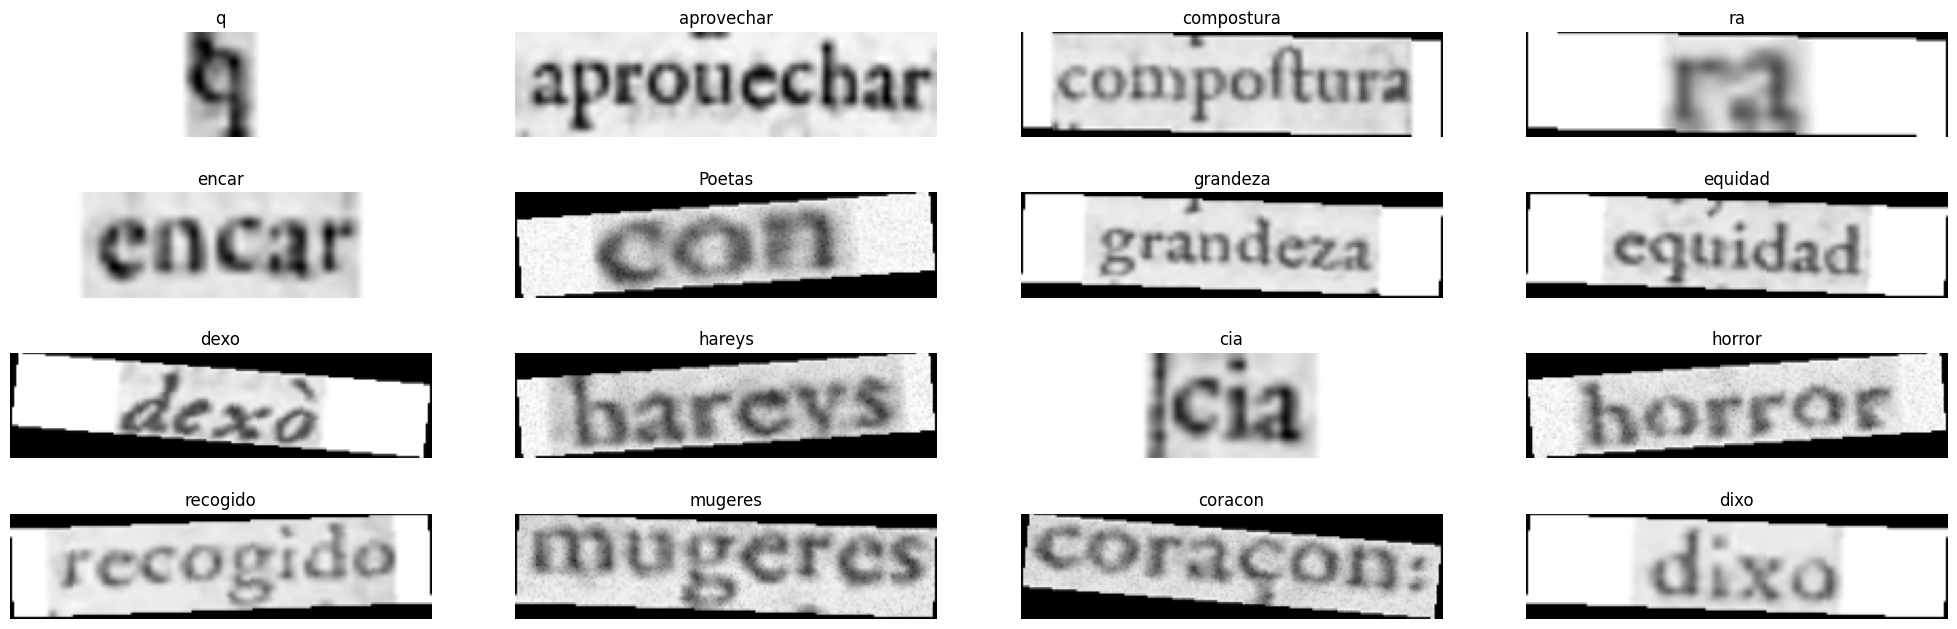

In [42]:
show_images(data=train_ds, cmap='gray')

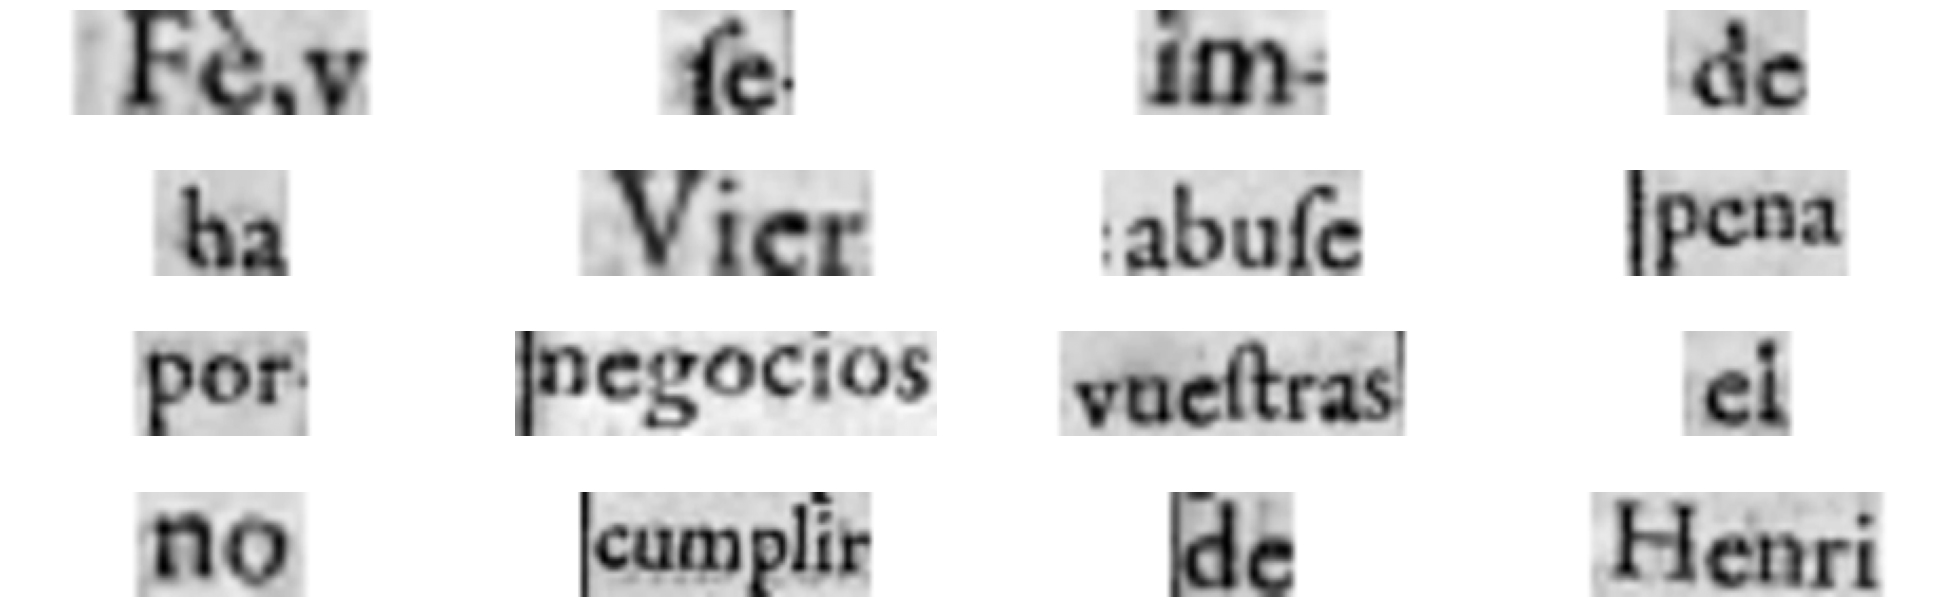

In [43]:
show_images(data=test_ds, cmap='gray')

# Model Definition

### Defines a custom Keras layer that computes and adds the Connectionist Temporal Classification (CTC) loss to the model for training sequence-to-sequence prediction tasks.

In [44]:
class CTCLayer(layers.Layer):
    def __init__(self, **kwargs) -> None:
        super().__init__(**kwargs)
        self.loss_fn = keras.backend.ctc_batch_cost
    def call(self, y_true, y_pred):
        batch_len = tf.cast(tf.shape(y_true)[0], dtype='int64')
        input_len = tf.cast(tf.shape(y_pred)[1], dtype='int64') * tf.ones(shape=(batch_len, 1), dtype='int64')
        label_len = tf.cast(tf.shape(y_true)[1], dtype='int64') * tf.ones(shape=(batch_len, 1), dtype='int64')
        loss = self.loss_fn(y_true, y_pred, input_len, label_len)
        self.add_loss(loss)
        return y_pred

### Decodes the predicted labels from the OCR model, converting numeric values back to characters and removing unknown tokens to produce the final text output.

In [45]:
def decode_pred(pred_label):

    '''
    The decode_pred function is used to decode the predicted labels generated by the OCR model.
    It takes a matrix of predicted labels as input, where each time step represents the probability
    for each character. The function uses CTC decoding to decode the numeric labels back into their
    character values. The function also removes any unknown tokens and returns the decoded texts as a
    list of strings. The function utilizes the num_to_char function to map numeric values back to their
    corresponding characters. Overall, the function is an essential step in the OCR process, as it allows
    us to obtain the final text output from the model's predictions.

    Argument :
        pred_label : These are the model predictions which are needed to be decoded.

    Return:
        filtered_text : This is the list of all the decoded and processed predictions.

    '''

    # Input length
    input_len = np.ones(shape=pred_label.shape[0]) * pred_label.shape[1]

    # CTC decode
    decode = keras.backend.ctc_decode(pred_label, input_length=input_len, greedy=True)[0][0][:,:MAX_LABEL_LENGTH]

    # Converting numerics back to their character values
    chars = num_to_char(decode)

    # Join all the characters
    texts = [tf.strings.reduce_join(inputs=char).numpy().decode('UTF-8') for char in chars]

    # Remove the unknown token
    filtered_texts = [text.replace('[UNK]', " ").strip() for text in texts]

    return filtered_texts

### This code defines a deep learning model for optical character recognition (OCR) using a combination of convolutional neural networks (CNNs) for feature extraction and bidirectional long short-term memory (LSTM) networks for sequence learning, concluding with a custom CTC loss layer for training.

In [46]:
# Input Layer
input_images = layers.Input(shape=(IMG_WIDTH, IMG_HEIGHT, 1), name="image")

# Labels : These are added for the training purpose.
target_labels = layers.Input(shape=(None, ), name="label")

# CNN Network
x = layers.Conv2D(
    filters=32,
    kernel_size=3,
    strides=1,
    padding='same',
    activation='relu',
    kernel_initializer='he_normal'
)(input_images)
x = layers.BatchNormalization()(x)

x = layers.Conv2D(
    filters=32,
    kernel_size=3,
    strides=1,
    padding='same',
    activation='relu',
    kernel_initializer='he_normal'
)(x)
x = layers.BatchNormalization()(x)

x = layers.MaxPool2D(pool_size=(2,2), strides=(2,2))(x)

x = layers.Conv2D(
    filters=64,
    kernel_size=3,
    strides=1,
    padding='same',
    activation='relu',
    kernel_initializer='he_normal'
)(x)
x = layers.BatchNormalization()(x)

x = layers.Conv2D(
    filters=128,
    kernel_size=3,
    strides=1,
    padding='same',
    activation='relu',
    kernel_initializer='he_normal'
)(x)
x = layers.BatchNormalization()(x)

x = layers.MaxPool2D(pool_size=(2,2), strides=(2,2))(x)

# Encoding Space
encoding = layers.Reshape(target_shape=((IMG_WIDTH//4), (IMG_HEIGHT//4)*128))(x)
encoding = layers.Dense(128, activation='relu', kernel_initializer='he_normal')(encoding)
encoding = layers.Dropout(0.5)(encoding)

# RNN Network
x = layers.Bidirectional(layers.LSTM(256, return_sequences=True, dropout=0.5))(encoding)
x = layers.Bidirectional(layers.LSTM(128, return_sequences=True, dropout=0.5))(x)

# Output Layer
output = layers.Dense(len(char_to_num.get_vocabulary())+1, activation='softmax')(x)

# CTC Layer
ctc_layer = CTCLayer()(target_labels, output)

# Model
ocr_model = keras.Model(
    inputs=[input_images, target_labels],
    outputs=[ctc_layer]
)

In [ ]:
plot_model(ocr_model, show_shapes=True, show_layer_names=True)

### Compiles the OCR model with the Adam optimizer and trains it on the training dataset with validation, using early stopping and model checkpoint callbacks.

Epoch 1/20


2025-03-22 18:03:00.809003: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8907
2025-03-22 18:03:01.744887: I tensorflow/stream_executor/cuda/cuda_blas.cc:1614] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


1335/1335 [==============================] - 54s 37ms/step - loss: 15.5746 - val_loss: 4.1758 - lr: 0.0010
Epoch 2/20
1335/1335 [==============================] - 49s 37ms/step - loss: 3.0696 - val_loss: 1.9895 - lr: 0.0010
Epoch 3/20
1335/1335 [==============================] - 50s 37ms/step - loss: 1.7142 - val_loss: 1.1733 - lr: 0.0010
Epoch 4/20
1335/1335 [==============================] - 51s 39ms/step - loss: 1.2287 - val_loss: 0.6090 - lr: 0.0010
Epoch 5/20
1335/1335 [==============================] - 53s 40ms/step - loss: 0.9066 - val_loss: 0.4644 - lr: 0.0010
Epoch 6/20
1335/1335 [==============================] - 55s 41ms/step - loss: 0.7167 - val_loss: 0.3273 - lr: 0.0010
Epoch 7/20
1335/1335 [==============================] - 55s 41ms/step - loss: 0.5924 - val_loss: 0.3042 - lr: 0.0010
Epoch 8/20
1335/1335 [==============================] - 54s 41ms/step - loss: 0.5048 - val_loss: 0.1960 - lr: 0.0010
Epoch 9/20
1335/1335 [==============================] - 54s 40ms/step - lo

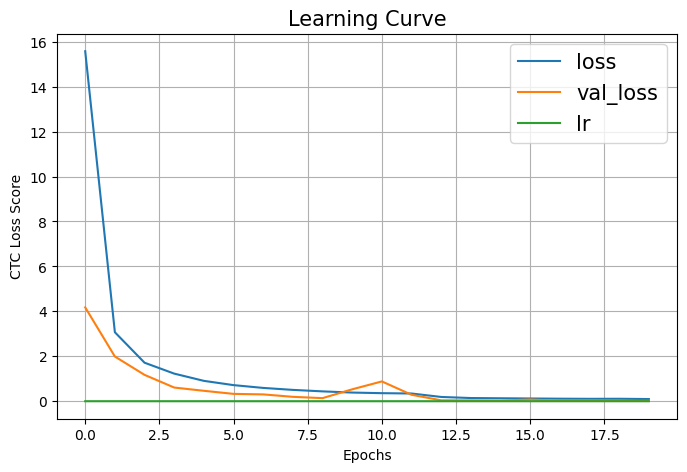

In [37]:
# Compile
ocr_model.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-3))

# Learning Rate Scheduler
lr_scheduler = callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=3,
    verbose=1,
    min_lr=1e-6
)

# Train
history = ocr_model.fit(
    train_ds,
    validation_data=valid_ds,
    epochs=EPOCHS,
    callbacks=[
        callbacks.EarlyStopping(patience=5, restore_best_weights=True),
        lr_scheduler
    ]
)

# Learning Curve
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.legend(fontsize=15)
plt.xlabel("Epochs")
plt.ylabel("CTC Loss Score")
plt.title("Learning Curve", fontsize=15)
plt.grid()
# plt.savefig("OCRModel-LearningCurve.png")
plt.show()

In [139]:
# Model Summary
ocr_model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 image (InputLayer)          [(None, 200, 50, 1)]         0         []                            
                                                                                                  
 conv2d_8 (Conv2D)           (None, 200, 50, 32)          320       ['image[0][0]']               
                                                                                                  
 batch_normalization_8 (Bat  (None, 200, 50, 32)          128       ['conv2d_8[0][0]']            
 chNormalization)                                                                                 
                                                                                                  
 conv2d_9 (Conv2D)           (None, 200, 50, 32)          9248      ['batch_normalization_8[

### Creates an inference model from the trained OCR model for making predictions and prints the model summary.

In [38]:
# Model required for inference
inference_model = keras.Model(
    inputs=ocr_model.get_layer(name="image").input,
    outputs=ocr_model.get_layer(name='dense_1').output
)

# Model summary
inference_model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 image (InputLayer)          [(None, 200, 50, 1)]      0         
                                                                 
 conv2d (Conv2D)             (None, 200, 50, 32)       320       
                                                                 
 batch_normalization (BatchN  (None, 200, 50, 32)      128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 200, 50, 32)       9248      
                                                                 
 batch_normalization_1 (Batc  (None, 200, 50, 32)      128       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 100, 25, 32)      0   

In [39]:
print(decode_pred(inference_model.predict(test_ds))[:10])   #convert to test_ds

/home/shashank/.local/lib/python3.10/site-packages/keras/engine/functional.py:637: UserWarning: Input dict contained keys ['label'] which did not match any model input. They will be ignored by the model.
  inputs = self._flatten_to_reference_inputs(inputs)


54/54 [==============================] - 5s 23ms/step
['Fe,y', 'se', 'im-', 'de', 'ha', 'Vier', 'abuse', 'pena', 'por', 'mnegocios']


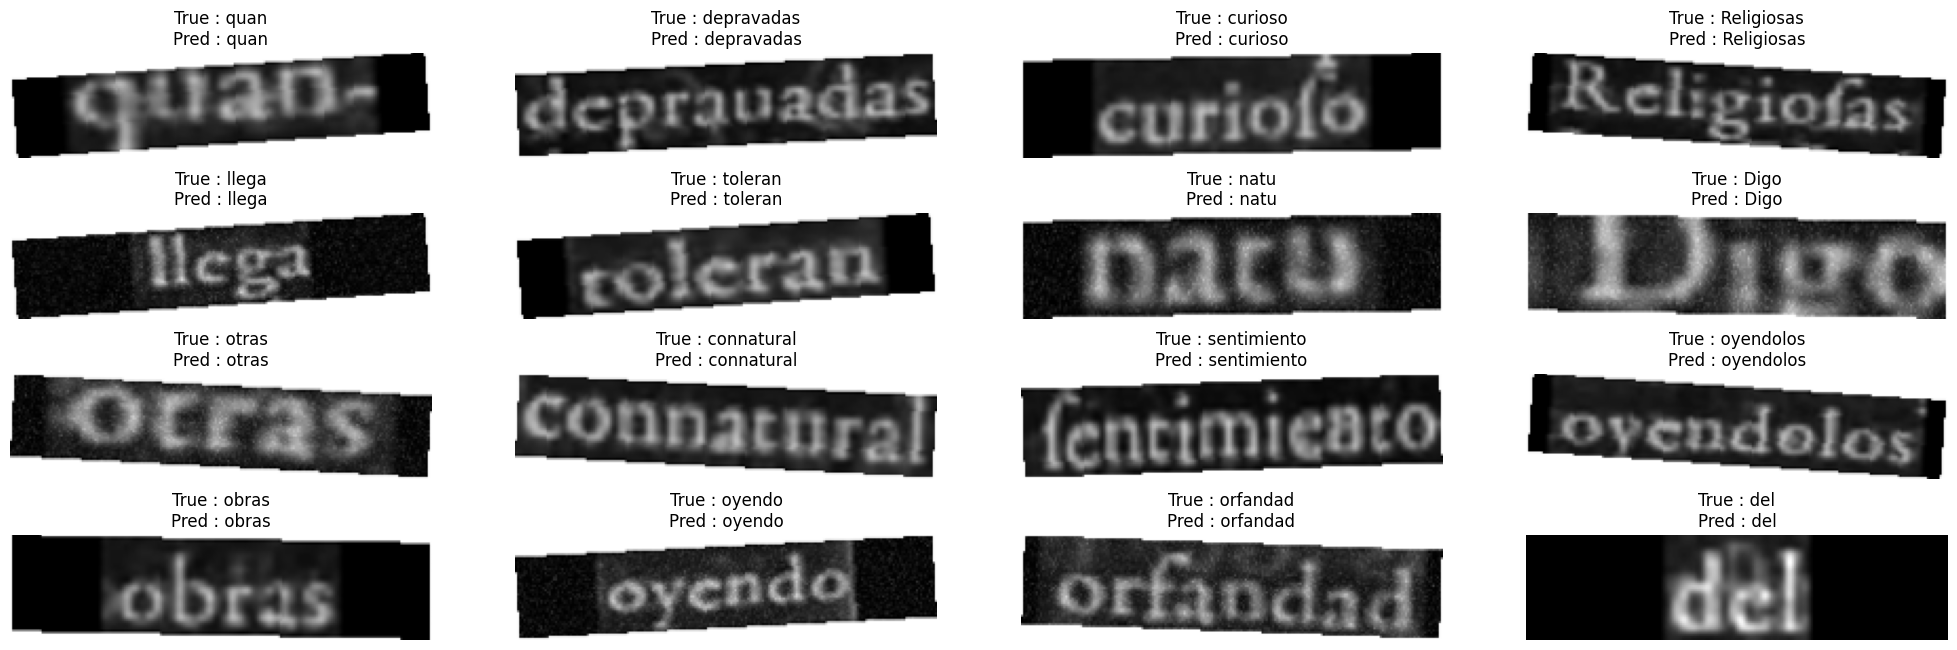

In [40]:
show_images(data=train_ds, model=inference_model, decode_pred=decode_pred, cmap='binary')

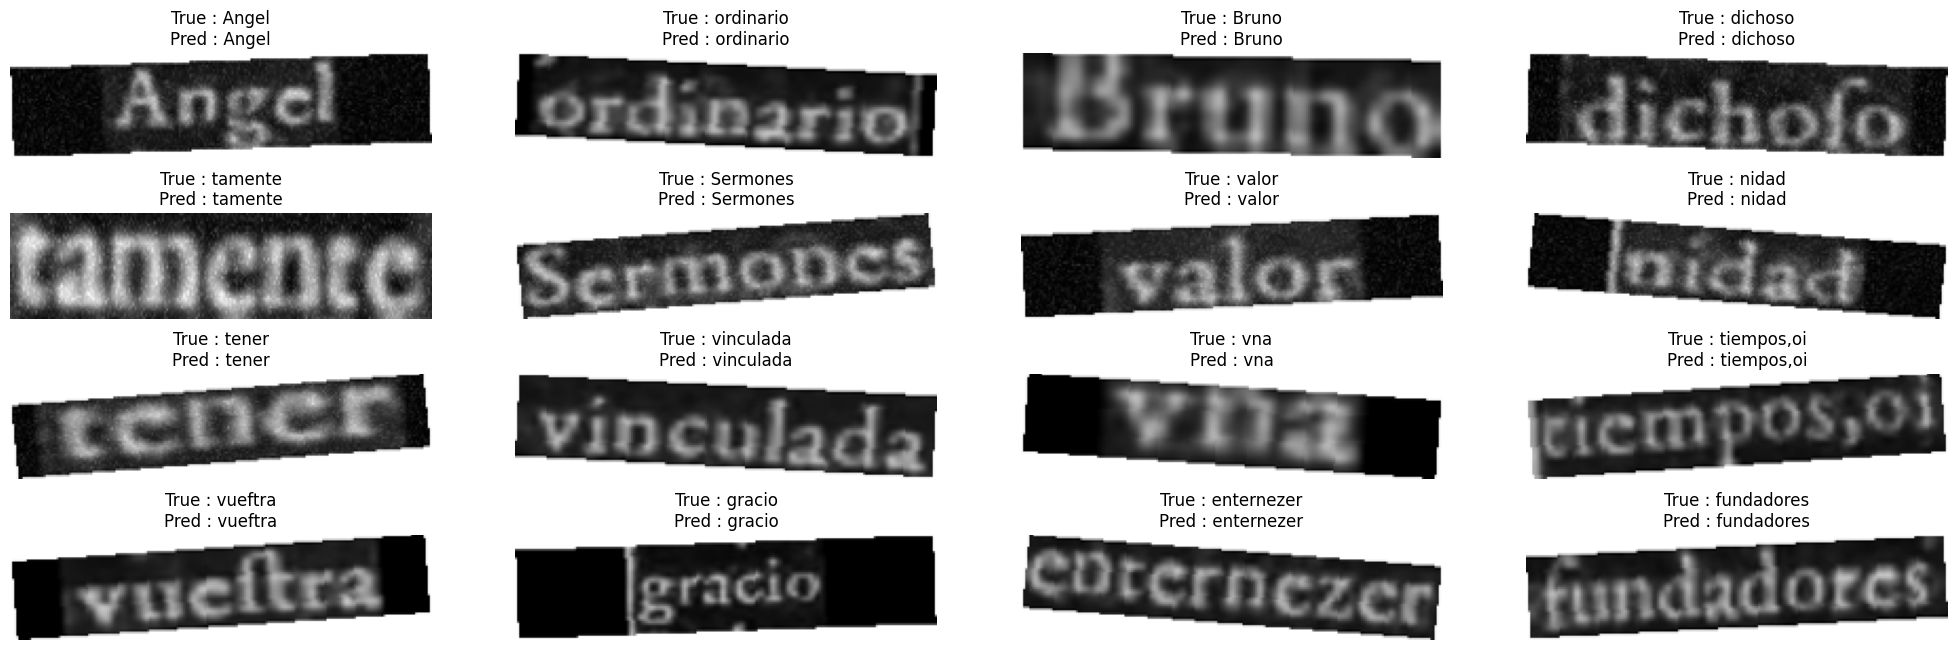

In [41]:
show_images(data=valid_ds, model=inference_model, decode_pred=decode_pred, cmap='binary')

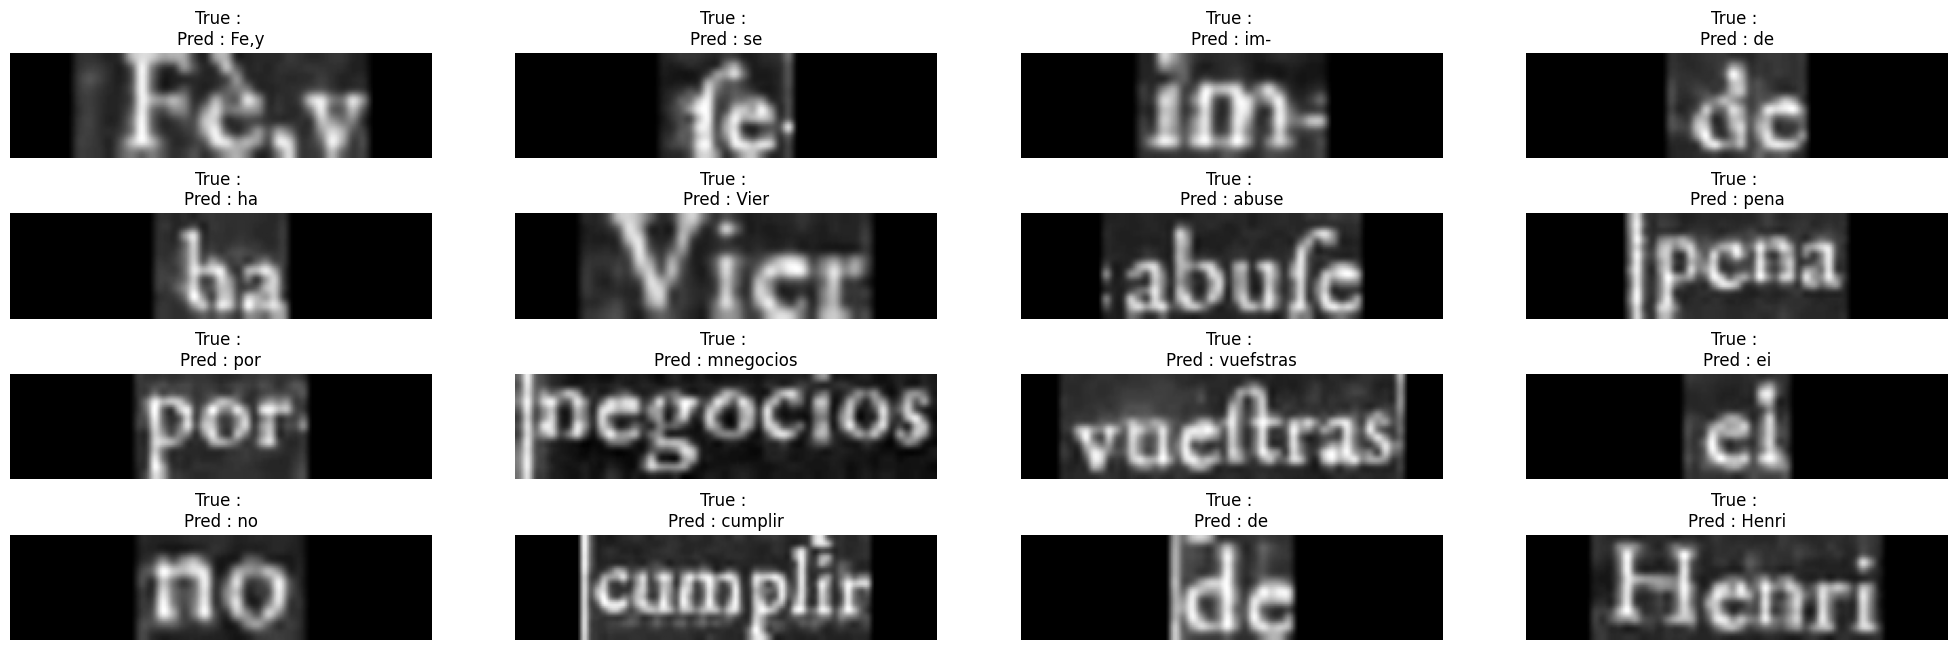

In [42]:
show_images(data=test_ds, model=inference_model, decode_pred=decode_pred, cmap='binary')

# Saving the model

In [43]:
# Saving the model
ocr_model.save('ocr_model.h5')

In [44]:
# Load the saved model using the code below
# loaded_model = keras.models.load_model('ocr_model.h5')

### Generates and decodes predictions from the inference model on the test dataset, printing the results as it is written in the book.


In [45]:
test_csv.head()

,FILENAME,IDENTITY
0,./testing_data1/381;15.png,381;15
1,./testing_data1/716;1.png,716;1
2,./testing_data1/659;13.png,659;13
3,./testing_data1/257;17.png,257;17
4,./testing_data1/250;16.png,250;16


In [46]:
df_infer = test_csv

# Step 1: Sort the dataframe based on values before ';'
df_infer['before_semicolon'] = df_infer['IDENTITY'].apply(lambda x: int(x.split(';')[0]))
df_infer['after_semicolon'] = df_infer['IDENTITY'].apply(lambda x: int(x.split(';')[1]))
sorted_df = df_infer.sort_values(['before_semicolon']).reset_index(drop=True)
sorted_df.drop(columns=['before_semicolon', 'after_semicolon'], inplace=True)

In [47]:
sorted_df.shape

(855, 2)

In [48]:
sorted_df.head()

,FILENAME,IDENTITY
0,./testing_data1/0;0.png,0;0
1,./testing_data1/1;0.png,1;0
2,./testing_data1/2;0.png,2;0
3,./testing_data1/3;0.png,3;0
4,./testing_data1/4;0.png,4;0


In [49]:
sorted_df['IDENTITY'] = sorted_df['IDENTITY'].astype(str)

sorted_dfs = tf.data.Dataset.from_tensor_slices(
    (np.array(sorted_df['FILENAME'].to_list()), np.array(sorted_df['IDENTITY'].to_list()))
).map(encode_single_sample, num_parallel_calls=AUTOTUNE).batch(BATCH_SIZE).prefetch(AUTOTUNE)

decoded_predictions = decode_pred(inference_model.predict(sorted_dfs))

54/54 [==============================] - 1s 13ms/step


In [50]:
sorted_df.head()

,FILENAME,IDENTITY
0,./testing_data1/0;0.png,0;0
1,./testing_data1/1;0.png,1;0
2,./testing_data1/2;0.png,2;0
3,./testing_data1/3;0.png,3;0
4,./testing_data1/4;0.png,4;0


In [51]:
pred = sorted_df['IDENTITY'].tolist()

# Print decoded predictions with a new line when there's a change in the number after ';'
current_group = None
i=0
for prediction in pred:
    before, after = map(int, prediction.split(';'))

    if current_group is None:
        current_group = after

    if after != current_group:
        print()  # Start a new line for the new group
        current_group = after

    print(decoded_predictions[i], end=' ')
    i+=1
print()

Si por cvitar un pecado mortal 
aveys de poner vueftra vida en pe- 
ligro, arriesgalda que es el meior 
empleo que della podeys hazer 
de vueftra hazienda para efte fin en 
redemir cavtivos sacar mugeres 
de pecado, dotandolas liberalmen- 
te- dixo hagas el bjen 
Caton nuna 
ll tpryr Tempfmae se sepa dad pues voy fin 
par- qualquiera obra con que 
huyreye labipocresia, pero tam- 
poco efcondays las que han de ser 
de buen estet pues es obliga 
cion de perfonas tales ei darla y lo 
contrario tentacion en algunos So 
ha gays profession de santero pe- 
ro de buen Christiano no apro- 
veyimas tampoco reproveys santi 
dades dudosas fino estimad las cier- 
tas, y aprobadas y a esto toca el no 
ser mila grero A cordaos del Rey 
anntir Luys que no quiso ver con los ojos 
siy, llo que mejor veya con la Fe 
Imitad 
imitad siatproci aquella esperan 
ca en Dios f tan glrien probada del 
gran Patriarcha Abraham y hazed za 
como dezia el Santo Padre Francis 
co de Boria todas las possibles dili- 
ge

# Saving pedictions as .txt file

In [52]:
formatted_output = []

current_group = None
i = 0
for prediction in pred:
    before, after = map(int, prediction.split(';'))

    if current_group is None:
        current_group = after

    if after != current_group:
        formatted_output.append('\n')  # Start a new line for the new group
        current_group = after

    formatted_output.append(decoded_predictions[i] + ' ')
    i += 1

formatted_output.append('\n')  # Final new line

with open('formatted_predictions.txt', 'w') as file:
    file.writelines(formatted_output)

In [53]:
predictions = decode_pred(inference_model.predict(valid_ds))
true = df_valid['IDENTITY'].tolist()

334/334 [==============================] - 4s 13ms/step


In [57]:
import numpy as np
from difflib import SequenceMatcher

def calculate_cer(predicted, ground_truth):
    # Calculate the Levenshtein distance between the predicted and ground truth
    matcher = SequenceMatcher(None, ground_truth, predicted)
    num_edits = sum(triple[-1] for triple in matcher.get_opcodes() if triple[0] != 'equal')

    # CER is the number of edits divided by the total number of characters in the ground truth
    return num_edits / len(ground_truth) if len(ground_truth) > 0 else 1.0

def calculate_accuracy(true_list, predictions_list):
    correct_count = sum([pred == gt for pred, gt in zip(predictions_list, true_list)])
    return correct_count / len(true_list)

# Calculate CER for each word and the overall Accuracy
cer_list = [calculate_cer(pred, gt) for pred, gt in zip(predictions, true)]
cer = np.mean(cer_list)

accuracy = calculate_accuracy(true, predictions)

print(f"Character Error Rate (CER): {cer}")
print(f"Accuracy: {accuracy}")

Character Error Rate (CER): 0.0019549060021235402
Accuracy: 0.995315720442196


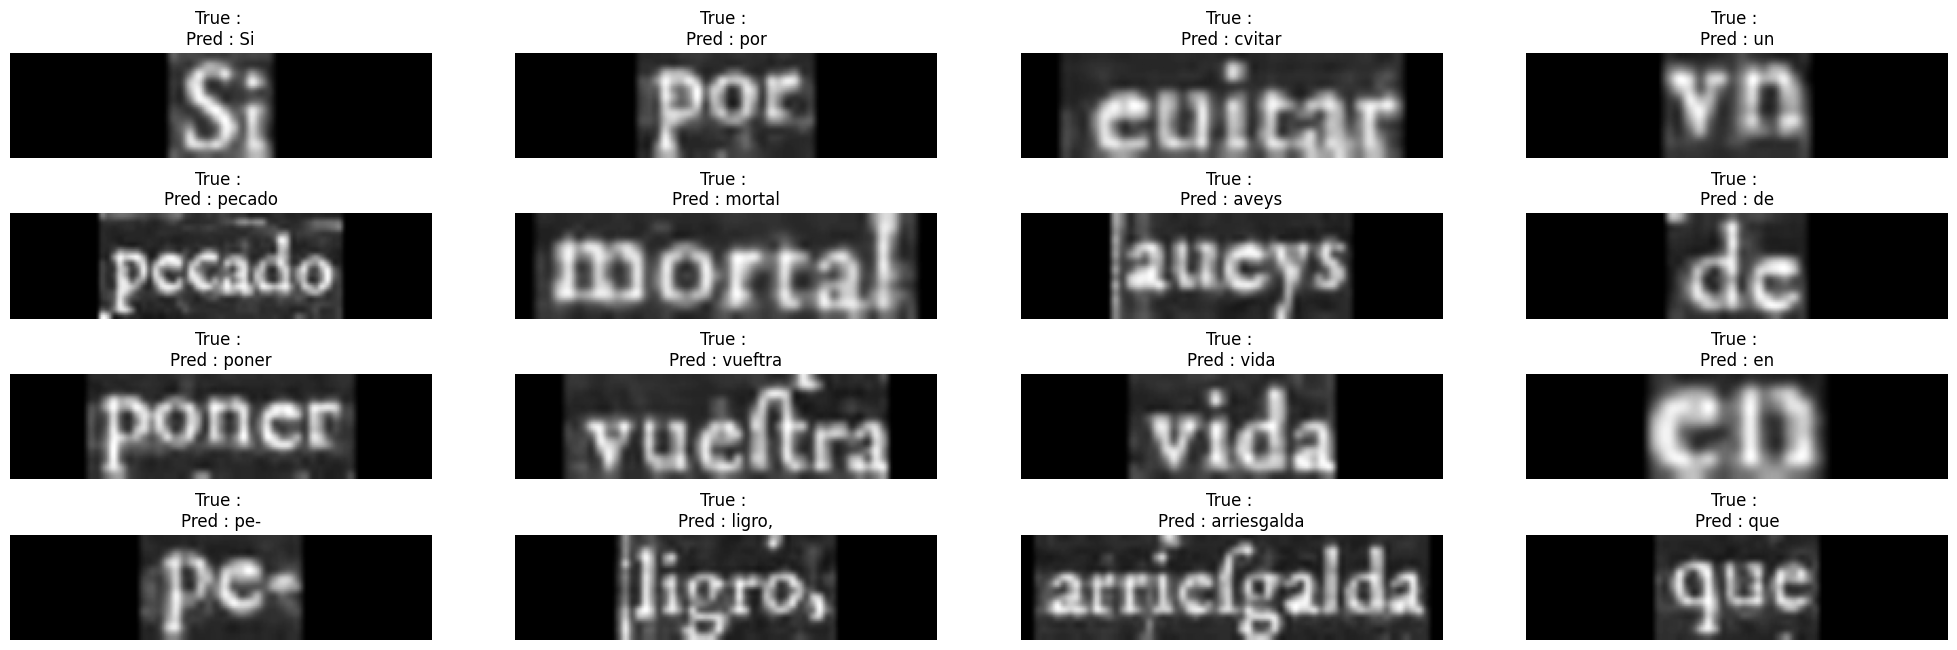

In [55]:
sorted_df = tf.data.Dataset.from_tensor_slices(
    (np.array(sorted_df['FILENAME'].to_list()), np.array(sorted_df['IDENTITY'].to_list()))
).map(encode_single_sample, num_parallel_calls=AUTOTUNE).batch(BATCH_SIZE).prefetch(AUTOTUNE)
show_images(data=sorted_df, model=inference_model, decode_pred=decode_pred, cmap='binary')